In this project, we will be cleaning and preprocessing credit risk data to be used for machine learning
analysis

Import Libraries

In [1]:
import numpy as np
import pandas as pd

Import Data

In [2]:
loan_data_backup = pd.read_csv("loan.csv")

/var/folders/mn/zs2q3c29703cr765qp7s8j2r0000gn/T/ipykernel_41540/4198844725.py:1: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv("loan.csv")


Make copy of data

In [3]:
loan_data = loan_data_backup.copy()

In [4]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,NaN,NaN,12000,12000,12000.0,60 months,14.08,279.72,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260664,NaN,NaN,12000,12000,12000.0,60 months,25.82,358.01,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260665,NaN,NaN,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260666,NaN,NaN,12000,12000,12000.0,60 months,21.45,327.69,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Set pd to show all columns

In [5]:
pd.options.display.max_columns = None

In [7]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

Show list of column names

In [8]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

Begin cleaning data

Show unique values of employment length

In [10]:
loan_data['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

Clean data so that only strings of numbers are left

In [11]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

/var/folders/mn/zs2q3c29703cr765qp7s8j2r0000gn/T/ipykernel_41540/2883447039.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


Check the data type of values in the column

In [13]:
type(loan_data['emp_length_int'][0])

str

They are still strings, so we will cast to numeric

In [14]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [15]:
type(loan_data['emp_length_int'][0])

numpy.float64

Now we'll clean up the term column

In [16]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [17]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
loan_data['term_int'] = loan_data['term_int'].str.replace(' ', '')

In [18]:
loan_data['term_int'].unique()

array(['36', '60'], dtype=object)

In [19]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [20]:
type(loan_data['term_int'][0])

numpy.int64

Now we'll clean the data in a date column, converting strings to date data types

In [21]:
loan_data['earliest_cr_line']

0          Apr-2001
1          Jun-1987
2          Apr-2011
3          Feb-2006
4          Dec-2000
             ...   
2260663    Jan-2004
2260664    Mar-2003
2260665    Feb-1995
2260666    Jul-2003
2260667    Apr-2014
Name: earliest_cr_line, Length: 2260668, dtype: object

In [22]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%Y')

Check the data type

In [23]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Make a new column that gives the total number of days from the earliest line of credit 
given to recent day

In [25]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2024-09-14') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [26]:
loan_data['mths_since_earliest_cr_line'].describe()

count    2.260639e+06
mean     2.967166e+02
std      9.417828e+01
min      1.060000e+02
25%      2.320000e+02
50%      2.810000e+02
75%      3.460000e+02
max      1.099000e+03
Name: mths_since_earliest_cr_line, dtype: float64

Do likewise with the issue date

In [29]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%Y')

In [30]:
type(loan_data['issue_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
loan_data['mths_since_issue_date'] = round(pd.to_numeric((pd.to_datetime('2024-09-14') - loan_data['issue_date']) / np.timedelta64(1, 'M')))

In [33]:
loan_data['mths_since_issue_date'].describe()

count    2.260668e+06
mean     9.995503e+01
std      2.161363e+01
min      6.900000e+01
25%      8.200000e+01
50%      9.800000e+01
75%      1.130000e+02
max      2.070000e+02
Name: mths_since_issue_date, dtype: float64

Generate dummy variables for categorical variables

Start with "grade"

In [34]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2260663,0,0,1,0,0,0,0
2260664,0,0,0,0,1,0,0
2260665,0,1,0,0,0,0,0
2260666,0,0,0,1,0,0,0


In [35]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2260663,0,0,1,0,0,0,0
2260664,0,0,0,0,1,0,0
2260665,0,1,0,0,0,0,0
2260666,0,0,0,1,0,0,0


Generate a list of the columns of dummy variables for all of the categorical variables

In [36]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')
                    ]

Concatenate all dummy columns into one dataframe

In [37]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [38]:
loan_data_dummies

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

Now concatenate the original dataframe with the dummies dataframe

In [40]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [41]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

Get a sense as to which columns have a significant amount of null values

In [42]:
loan_data.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_date,mths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_st

Sum the amount of the null values by column, showing all the columns

In [43]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                                                 2260668
member_id                                                          2260668
loan_amnt                                                                0
funded_amnt                                                              0
funded_amnt_inv                                                          0
term                                                                     0
int_rate                                                                 0
installment                                                              0
grade                                                                    0
sub_grade                                                                0
emp_title                                                           166969
emp_length                                                          146907
home_ownership                                                           0
annual_inc               

If the 'total_rev_hi_lim' is null, we can assume it should be the same value as the funded amount

In [45]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

Make sure there are no null values left in the 'total_rev_hi_lim' column

In [46]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

If the annual income value is null, impute with the average income value

In [47]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace = True)

In [48]:
loan_data['annual_inc'].isnull().sum()

0

For the following columns, if the value is null, impute a value of zero

In [49]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)

Now we will begin to work on preparing data for the probability of default model

Start with the loan status column. This will be our dependent variable. 
Start by looking at the distinct values in the column

In [51]:
loan_data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [52]:
loan_data['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [53]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64

All of these categories can be recatagorized as either "good" or "bad" 
Make a new column, if the loan status is default or something logically/semantically
equivalent, we'll make that a value of zero, otherwise it will get a value of 1

In [54]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default', 
                                                                'Does not meet the credit policy. Status:Charged Off', 
                                                                'Late (31-120 days)']), 0, 1)

Now we will split data for the machine learning algorithm

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2)

Check out the shapes of the test and train dataframes, make sure that the split makes sense e.g. the targets
should have just one column

In [58]:
loan_data_inputs_train.shape

(1808534, 278)

In [59]:
loan_data_inputs_test.shape

(452134, 278)

In [60]:
loan_data_targets_train.shape

(1808534,)

In [61]:
loan_data_targets_test.shape

(452134,)

Save the training datasets to new datasets that will be used for preprocessing

In [228]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train


See how many unique values for 'grade' there are

In [229]:
df_inputs_prepr['grade'].unique()

array(['B', 'A', 'C', 'D', 'E', 'F', 'G'], dtype=object)

Make new dataframe of grade and target values

In [230]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
946945,B,1
2235011,B,1
1444818,B,1
139727,B,1
1335766,A,1


We will be calculating the Weight of Evidence, and the Information Value for each category of the variable.
In the following code, we will be building out the table, column by column

Aggregate the sum of good values grouped by grade, using generic names for columns
as we will use these later to build a function for other categorical columns

In [231]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,86234
1,B,132735
2,C,130307
3,D,65012
4,E,27045
5,F,8387
6,G,2414


Find the proportion of good targets by grade

In [232]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.964480
1,B,0.915878
2,C,0.859470
3,D,0.800806
4,E,0.719615
5,F,0.638250
6,G,0.601906


Make new dataframe that shows count and average by grade

In [233]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()],
                 axis = 1)

In [234]:
df1

,grade,good_bad,grade,good_bad
0,A,86234,A,0.964480
1,B,132735,B,0.915878
2,C,130307,C,0.859470
3,D,65012,D,0.800806
4,E,27045,E,0.719615
5,F,8387,F,0.638250
6,G,2414,G,0.601906


Remove redundant column

In [235]:
df1 = df1.iloc[: , [0,1,3]]
df1

,grade,good_bad,good_bad
0,A,86234,0.964480
1,B,132735,0.915878
2,C,130307,0.859470
3,D,65012,0.800806
4,E,27045,0.719615
5,F,8387,0.638250
6,G,2414,0.601906


Rename columns

In [236]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']

Find the proportion of each grade by the total number of observations

In [238]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [239]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,86234,0.964480,0.190727
1,B,132735,0.915878,0.293574
2,C,130307,0.859470,0.288204
3,D,65012,0.800806,0.143789
4,E,27045,0.719615,0.059816
5,F,8387,0.638250,0.018550
6,G,2414,0.601906,0.005339


Find the total number of good targets and bad targets by grade category, by
multiplying the sum in each category by the respective proportions

In [240]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,86234,0.964480,0.190727,83171.0,3063.0
1,B,132735,0.915878,0.293574,121569.0,11166.0
2,C,130307,0.859470,0.288204,111995.0,18312.0
3,D,65012,0.800806,0.143789,52062.0,12950.0
4,E,27045,0.719615,0.059816,19462.0,7583.0
5,F,8387,0.638250,0.018550,5353.0,3034.0
6,G,2414,0.601906,0.005339,1453.0,961.0


Calculate for each grade the proportion of the number of good targets
by the total number of good targets, and likewise with the bad ones

In [241]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,86234,0.964480,0.190727,83171.0,3063.0,0.210525,0.053672
1,B,132735,0.915878,0.293574,121569.0,11166.0,0.307719,0.195658
2,C,130307,0.859470,0.288204,111995.0,18312.0,0.283485,0.320875
3,D,65012,0.800806,0.143789,52062.0,12950.0,0.131781,0.226918
4,E,27045,0.719615,0.059816,19462.0,7583.0,0.049263,0.132874
5,F,8387,0.638250,0.018550,5353.0,3034.0,0.013550,0.053164
6,G,2414,0.601906,0.005339,1453.0,961.0,0.003678,0.016839


Now calculate the Weight of Evidence for each factor

In [242]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,86234,0.964480,0.190727,83171.0,3063.0,0.210525,0.053672,1.366715
1,B,132735,0.915878,0.293574,121569.0,11166.0,0.307719,0.195658,0.452819
2,C,130307,0.859470,0.288204,111995.0,18312.0,0.283485,0.320875,-0.123892
3,D,65012,0.800806,0.143789,52062.0,12950.0,0.131781,0.226918,-0.543450
4,E,27045,0.719615,0.059816,19462.0,7583.0,0.049263,0.132874,-0.992234
5,F,8387,0.638250,0.018550,5353.0,3034.0,0.013550,0.053164,-1.367014
6,G,2414,0.601906,0.005339,1453.0,961.0,0.003678,0.016839,-1.521378


Sort the dataframe by WoE, reset the index

In [243]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2414,0.601906,0.005339,1453.0,961.0,0.003678,0.016839,-1.521378
1,F,8387,0.638250,0.018550,5353.0,3034.0,0.013550,0.053164,-1.367014
2,E,27045,0.719615,0.059816,19462.0,7583.0,0.049263,0.132874,-0.992234
3,D,65012,0.800806,0.143789,52062.0,12950.0,0.131781,0.226918,-0.543450
4,C,130307,0.859470,0.288204,111995.0,18312.0,0.283485,0.320875,-0.123892
5,B,132735,0.915878,0.293574,121569.0,11166.0,0.307719,0.195658,0.452819
6,A,86234,0.964480,0.190727,83171.0,3063.0,0.210525,0.053672,1.366715


Calculate the Information Value for 'grade'

In [245]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2414,0.601906,0.005339,1453.0,961.0,0.003678,0.016839,-1.521378,NaN,NaN,0.47859
1,F,8387,0.638250,0.018550,5353.0,3034.0,0.013550,0.053164,-1.367014,0.036344,0.154364,0.47859
2,E,27045,0.719615,0.059816,19462.0,7583.0,0.049263,0.132874,-0.992234,0.081366,0.374780,0.47859
3,D,65012,0.800806,0.143789,52062.0,12950.0,0.131781,0.226918,-0.543450,0.081191,0.448785,0.47859
4,C,130307,0.859470,0.288204,111995.0,18312.0,0.283485,0.320875,-0.123892,0.058664,0.419558,0.47859
5,B,132735,0.915878,0.293574,121569.0,11166.0,0.307719,0.195658,0.452819,0.056407,0.576711,0.47859
6,A,86234,0.964480,0.190727,83171.0,3063.0,0.210525,0.053672,1.366715,0.048603,0.913895,0.47859


Create function for all other discrete variables using the steps above

In [246]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()],
                 axis = 1)
    df = df.iloc[: , [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    
    
    

Test the function, make sure it gives same result as before

In [247]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2414,0.601906,0.005339,1453.0,961.0,0.003678,0.016839,-1.521378,NaN,NaN,0.47859
1,F,8387,0.638250,0.018550,5353.0,3034.0,0.013550,0.053164,-1.367014,0.036344,0.154364,0.47859
2,E,27045,0.719615,0.059816,19462.0,7583.0,0.049263,0.132874,-0.992234,0.081366,0.374780,0.47859
3,D,65012,0.800806,0.143789,52062.0,12950.0,0.131781,0.226918,-0.543450,0.081191,0.448785,0.47859
4,C,130307,0.859470,0.288204,111995.0,18312.0,0.283485,0.320875,-0.123892,0.058664,0.419558,0.47859
5,B,132735,0.915878,0.293574,121569.0,11166.0,0.307719,0.195658,0.452819,0.056407,0.576711,0.47859
6,A,86234,0.964480,0.190727,83171.0,3063.0,0.210525,0.053672,1.366715,0.048603,0.913895,0.47859


Preprocessing Discrete Variables: Visualizing Results

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Create function to plot the Weight of Evidence

In [249]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

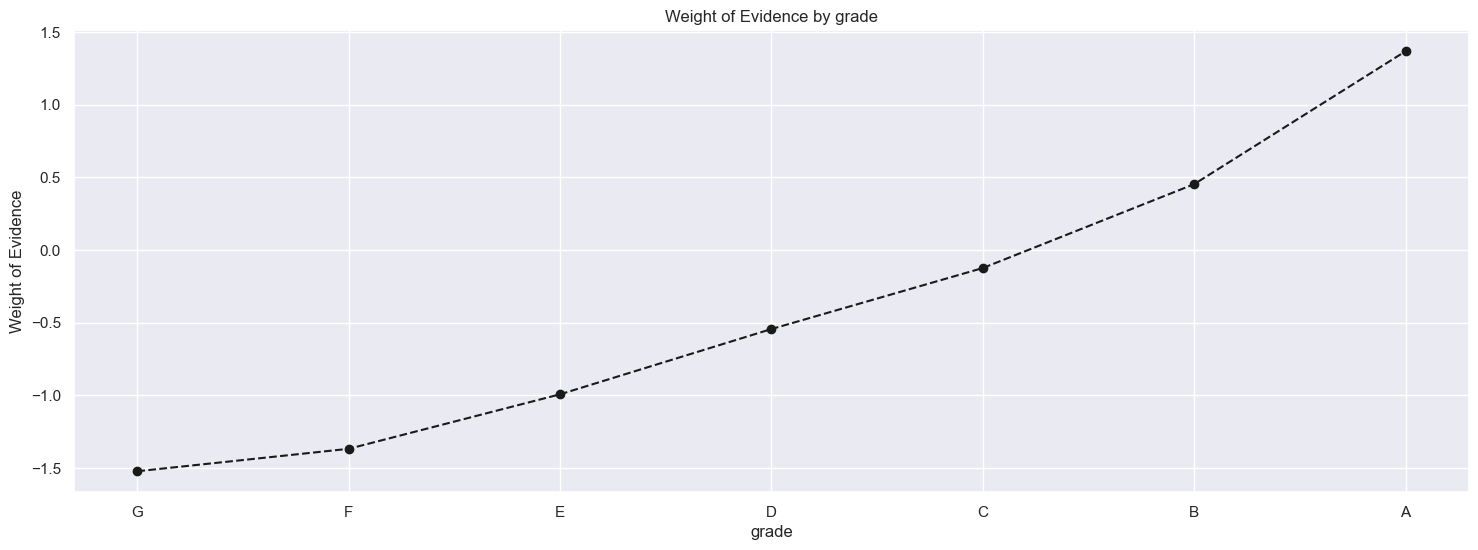

In [250]:
plot_by_woe(df_temp)

Now calculate Weight of Evidence for 'home_ownership'

In [251]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,29,0.793103,0.000064,23.0,6.0,0.000058,0.000105,-0.591054,NaN,NaN,0.023965
1,NONE,11,0.818182,0.000024,9.0,2.0,0.000023,0.000035,-0.430712,0.025078,0.160343,0.023965
2,RENT,179266,0.853575,0.396489,153017.0,26249.0,0.387321,0.459952,-0.171868,0.035393,0.258844,0.023965
3,OWN,50649,0.873877,0.112022,44261.0,6388.0,0.112035,0.111935,0.000893,0.020302,0.172762,0.023965
4,MORTGAGE,221961,0.890035,0.490919,197553.0,24408.0,0.500052,0.427693,0.156307,0.016158,0.155413,0.023965
5,ANY,218,0.926606,0.000482,202.0,16.0,0.000511,0.000280,0.600890,0.036571,0.444583,0.023965


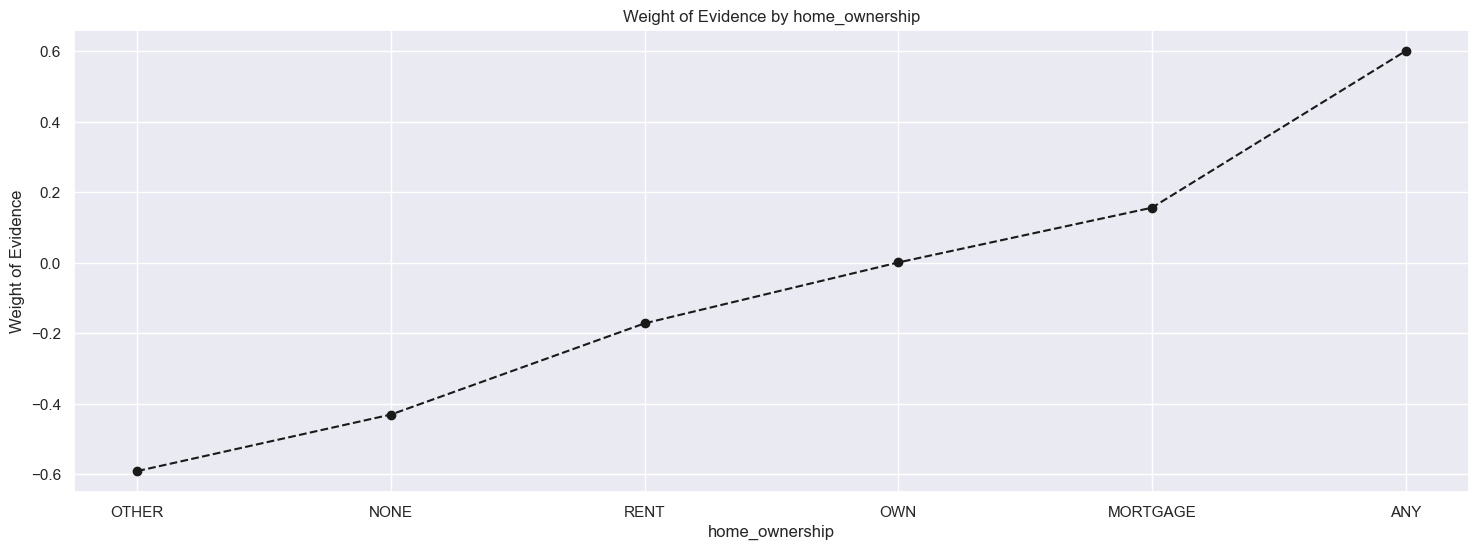

In [252]:
plot_by_woe(df_temp)

Let's combine the "other", "none", and "any" category with the riskiest category with enough number of oberservations, "rent"

In [253]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], 
                                                             df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'],
                                                             df_inputs_prepr['home_ownership:ANY']])

Find unique values for state

In [254]:
df_inputs_prepr['addr_state'].unique()

array(['OH', 'MI', 'MA', 'MS', 'CA', 'TX', 'GA', 'IL', 'NV', 'NJ', 'FL',
       'NY', 'NE', 'KY', 'RI', 'OK', 'NH', 'TN', 'SD', 'IN', 'AL', 'VA',
       'ND', 'LA', 'NC', 'WA', 'CO', 'AR', 'MO', 'AZ', 'NM', 'DC', 'MN',
       'SC', 'MT', 'PA', 'CT', 'KS', 'OR', 'UT', 'AK', 'MD', 'HI', 'ME',
       'DE', 'WV', 'WI', 'ID', 'VT', 'WY', 'IA'], dtype=object)

Find Weight of Evidence for 'addr_state'

In [255]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,2,0.500000,0.000004,1.0,1.0,0.000003,0.000018,-1.934789,NaN,NaN,0.014189
1,AR,3361,0.844392,0.007434,2838.0,523.0,0.007184,0.009164,-0.243516,0.344392,1.691273,0.014189
2,AL,5317,0.845213,0.011760,4494.0,823.0,0.011375,0.014421,-0.237247,0.000822,0.006269,0.014189
3,MS,2541,0.846124,0.005620,2150.0,391.0,0.005442,0.006851,-0.230274,0.000910,0.006973,0.014189
4,OK,4175,0.852934,0.009234,3561.0,614.0,0.009014,0.010759,-0.176987,0.006811,0.053286,0.014189
5,LA,5180,0.855019,0.011457,4429.0,751.0,0.011211,0.013160,-0.160266,0.002085,0.016722,0.014189
6,NV,6639,0.855551,0.014684,5680.0,959.0,0.014377,0.016804,-0.155974,0.000531,0.004292,0.014189
7,FL,32357,0.862657,0.071565,27913.0,4444.0,0.070654,0.077871,-0.097252,0.007107,0.058722,0.014189
8,SD,950,0.863158,0.002101,820.0,130.0,0.002076,0.002278,-0.093019,0.000501,0.004232,0.014189
9,NY,37383,0.865126,0.082681,32341.0,5042.0,0.081862,0.088349,-0.076256,0.001968,0.016763,0.014189


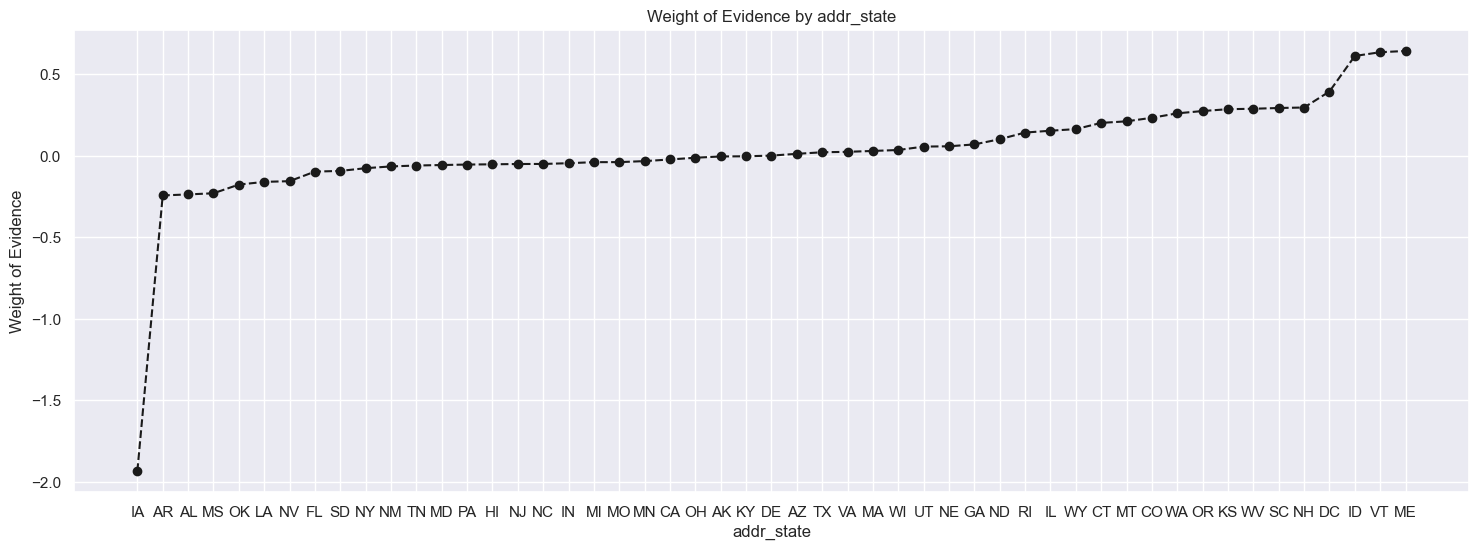

In [256]:
plot_by_woe(df_temp)

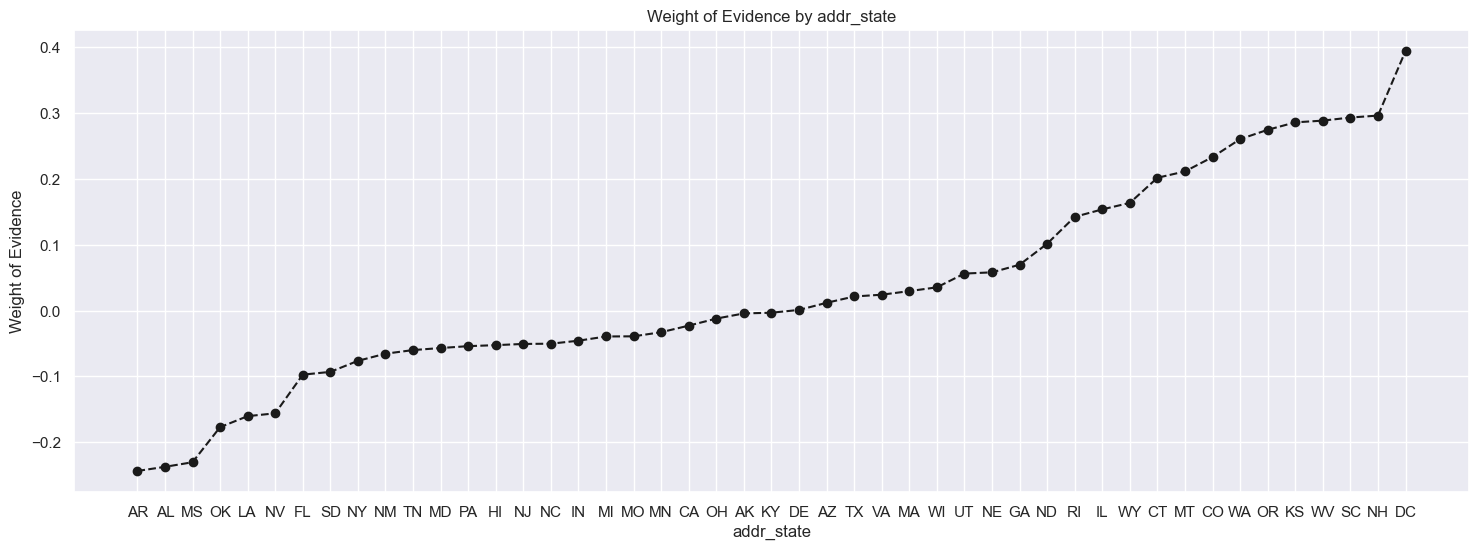

In [257]:
#Run the plot without the outliers
plot_by_woe(df_temp.iloc[1: -3, :])

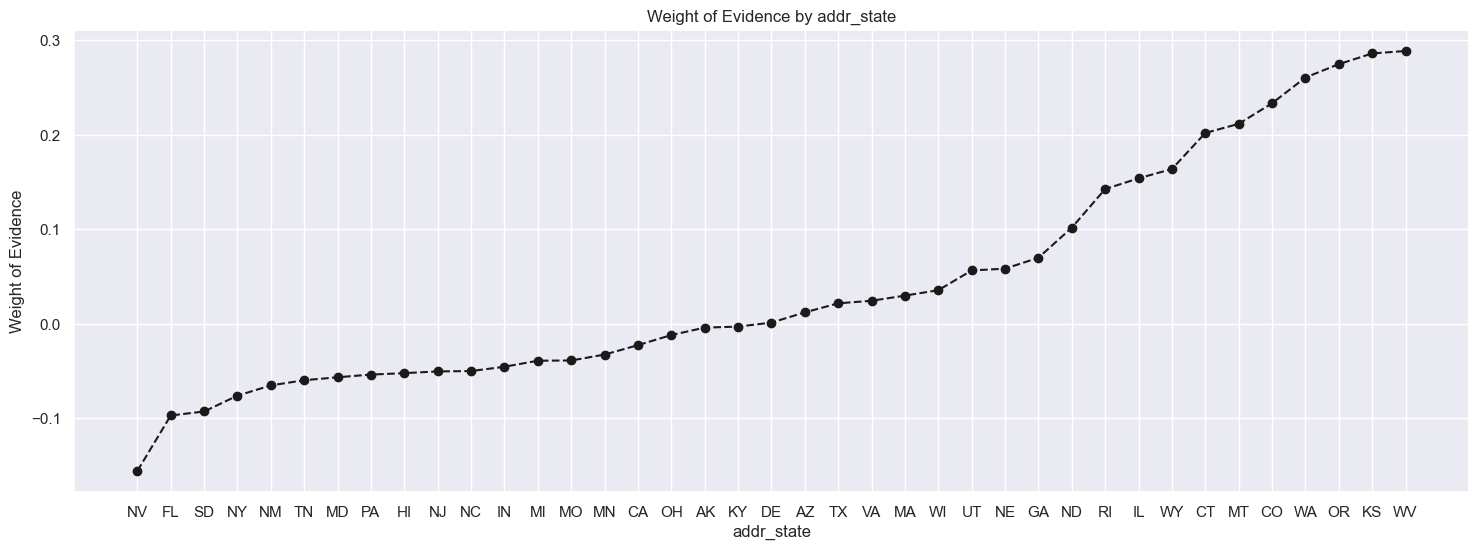

In [258]:
plot_by_woe(df_temp.iloc[6 : -6, :])

Group together similar values for ML processing, reducing the number of categories to a more manageable amount

In [259]:
df_inputs_prepr['addr_state:AR_AL_LA_OK_MS'] = sum([df_inputs_prepr['addr_state:AR'],
                                                      df_inputs_prepr['addr_state:AL'],
                                                      df_inputs_prepr['addr_state:LA'],
                                                      df_inputs_prepr['addr_state:OK'],
                                                      df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:NM_HI_FL_SD_MO_NC_MD_NJ_IN_KY_PA'] = sum([df_inputs_prepr['addr_state:NM'],
                                                              df_inputs_prepr['addr_state:HI'],
                                                              df_inputs_prepr['addr_state:FL'],
                                                              df_inputs_prepr['addr_state:SD'],
                                                              df_inputs_prepr['addr_state:MO'],
                                                              df_inputs_prepr['addr_state:NC'],
                                                            df_inputs_prepr['addr_state:MD'],
                                                            df_inputs_prepr['addr_state:NJ'],
                                                            df_inputs_prepr['addr_state:IN'],
                                                            df_inputs_prepr['addr_state:KY'],
                                                             df_inputs_prepr['addr_state:PA']])

df_inputs_prepr['addr_state:AK_TN_VA_MI_AZ_MN_OH_TX_NE_MA_DE_UT_WI'] = sum([df_inputs_prepr['addr_state:AK'],
                                                              df_inputs_prepr['addr_state:TN'],
                                                              df_inputs_prepr['addr_state:VA'],
                                                              df_inputs_prepr['addr_state:MI'],
                                                              df_inputs_prepr['addr_state:AZ'],
                                                              df_inputs_prepr['addr_state:MN'],
                                                            df_inputs_prepr['addr_state:OH'],
                                                            df_inputs_prepr['addr_state:TX'],
                                                            df_inputs_prepr['addr_state:NE'],
                                                            df_inputs_prepr['addr_state:MA'],
                                                             df_inputs_prepr['addr_state:DE'],
                                                                df_inputs_prepr['addr_state:UT'],
                                                            df_inputs_prepr['addr_state:WI']
                                                           ])

df_inputs_prepr['addr_state:GA_RI_MT_IL_KS_ND_CT_WY_WA_CO_SC_WV'] = sum([df_inputs_prepr['addr_state:GA'],
                                                              df_inputs_prepr['addr_state:RI'],
                                                              df_inputs_prepr['addr_state:MT'],
                                                              df_inputs_prepr['addr_state:IL'],
                                                              df_inputs_prepr['addr_state:KS'],
                                                              df_inputs_prepr['addr_state:ND'],
                                                            df_inputs_prepr['addr_state:CT'],
                                                            df_inputs_prepr['addr_state:WY'],
                                                            df_inputs_prepr['addr_state:WA'],
                                                            df_inputs_prepr['addr_state:CO'],
                                                             df_inputs_prepr['addr_state:SC'],
                                                                df_inputs_prepr['addr_state:WV']
                                                            ])
df_inputs_prepr['addr_state:OR_DC_NH_VT_ID_ME'] = sum([df_inputs_prepr['addr_state:OR'],
                                                      df_inputs_prepr['addr_state:DC'],
                                                      df_inputs_prepr['addr_state:NH'],
                                                      df_inputs_prepr['addr_state:VT'],
                                                      df_inputs_prepr['addr_state:ID'],
                                                      df_inputs_prepr['addr_state:ME']])

Calculate WoE and IV (Information Value) for 'verification_status'

In [260]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,126104,0.833978,0.278908,105168.0,20936.0,0.266204,0.366854,-0.320700,NaN,NaN,0.084121
1,Source Verified,177346,0.868494,0.392242,154024.0,23322.0,0.389870,0.408663,-0.047078,0.034516,0.273622,0.084121
2,Not Verified,148684,0.913837,0.328849,135873.0,12811.0,0.343926,0.224483,0.426627,0.045343,0.473705,0.084121


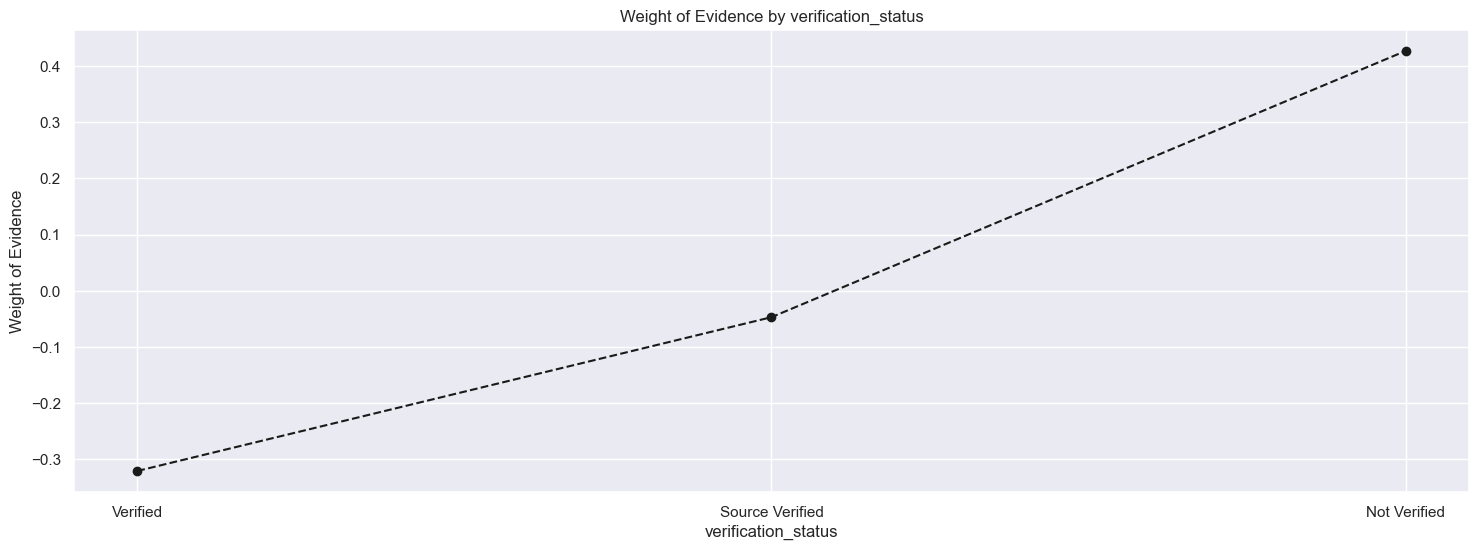

In [261]:
plot_by_woe(df_temp)

Calculate WoE and IV (Information Value) for 'purpose'

In [262]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp


,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,89,0.764045,0.000197,68.0,21.0,0.000172,0.000368,-0.759804,NaN,NaN,0.023481
1,small_business,4975,0.796784,0.011003,3964.0,1011.0,0.010034,0.017715,-0.568476,0.032739,0.191328,0.023481
2,renewable_energy,303,0.841584,0.000670,255.0,48.0,0.000645,0.000841,-0.264727,0.044800,0.303749,0.023481
3,moving,3159,0.853118,0.006987,2695.0,464.0,0.006822,0.008131,-0.175520,0.011534,0.089206,0.023481
4,debt_consolidation,255953,0.863561,0.566100,221031.0,34922.0,0.559480,0.611926,-0.089603,0.010443,0.085917,0.023481
5,house,2818,0.867991,0.006233,2446.0,372.0,0.006191,0.006518,-0.051474,0.004431,0.038130,0.023481
6,medical,5477,0.867993,0.012114,4754.0,723.0,0.012033,0.012669,-0.051457,0.000002,0.000017,0.023481
7,other,27466,0.875664,0.060747,24051.0,3415.0,0.060879,0.059840,0.017210,0.007671,0.068667,0.023481
8,vacation,3162,0.877293,0.006994,2774.0,388.0,0.007022,0.006799,0.032251,0.001628,0.015041,0.023481
9,wedding,515,0.877670,0.001139,452.0,63.0,0.001144,0.001104,0.035758,0.000377,0.003507,0.023481


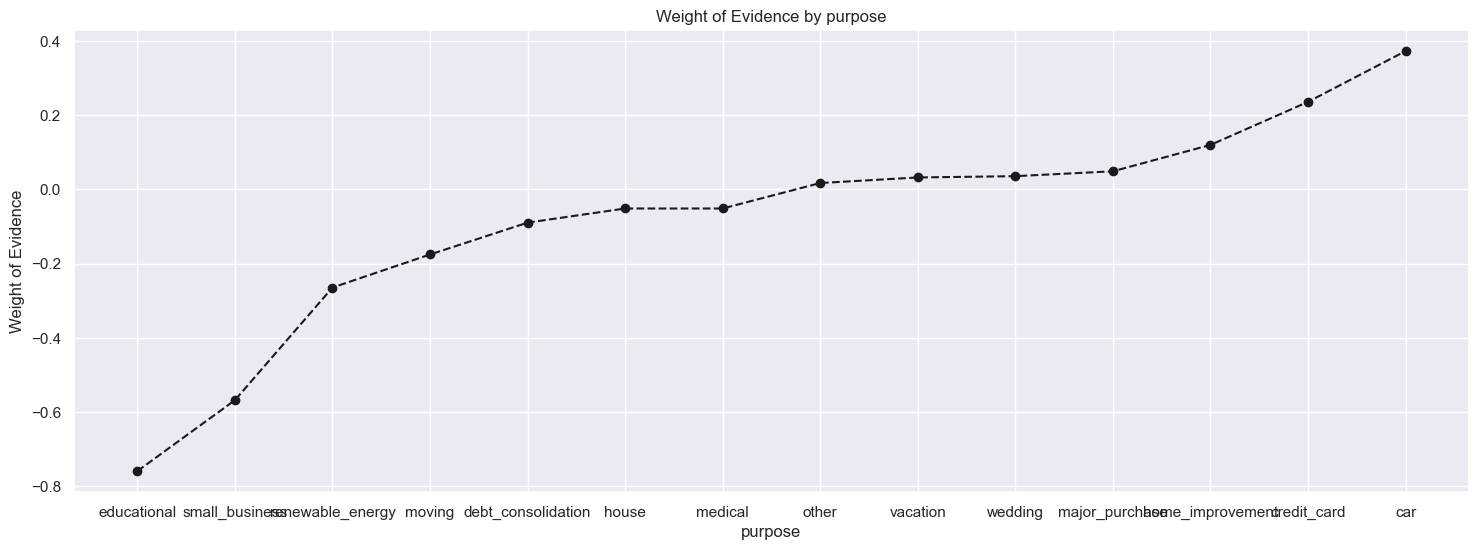

In [263]:
plot_by_woe(df_temp)

Group together similar values

In [264]:
 df_inputs_prepr['purpose:ED_SB_RE_MOVE']= sum([df_inputs_prepr['purpose:educational'],
                                                      df_inputs_prepr['purpose:small_business'],
                                                      df_inputs_prepr['purpose:renewable_energy'],
                                                      df_inputs_prepr['purpose:moving']
                                                      ])
    
df_inputs_prepr['purpose:MED_WED_OTHER_HOUSE_VAC_MAJ_PUR_HOME_IMP_CC_CAR']= sum([df_inputs_prepr['purpose:medical'],
                                                      df_inputs_prepr['purpose:wedding'],
                                                      df_inputs_prepr['purpose:other'],
                                                      df_inputs_prepr['purpose:house'],
                                                     df_inputs_prepr['purpose:vacation'],
                                                    df_inputs_prepr['purpose:major_purchase'],
                                                    df_inputs_prepr['purpose:home_improvement'],
                                                        df_inputs_prepr['purpose:credit_card'],
                                                                df_inputs_prepr['purpose:car']
                                                                                      
                                                      ])
   

Calculate WoE and IV (Information Value) for 'initial_list_status'

In [265]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,145442,0.841903,0.321679,122448.0,22994.0,0.309944,0.402916,-0.262336,NaN,NaN,0.037844
1,w,306692,0.888895,0.678321,272617.0,34075.0,0.690056,0.597084,0.144715,0.046992,0.407051,0.037844


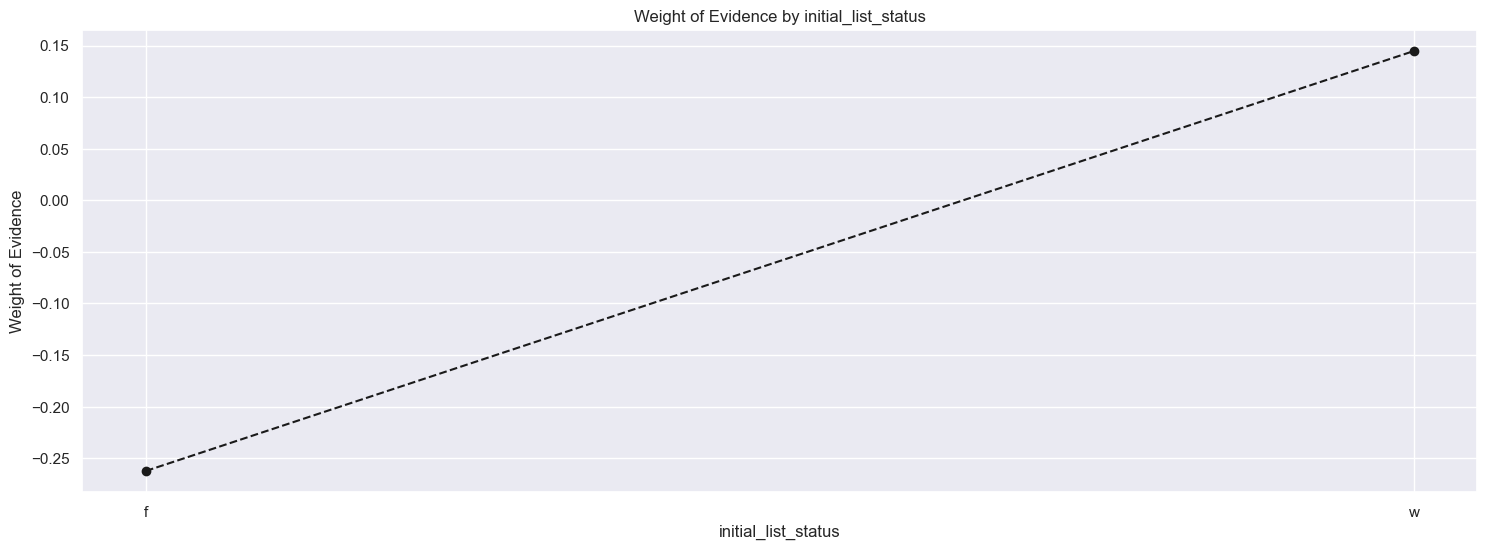

In [266]:
plot_by_woe(df_temp)

Preprocessing Continuous Variables

We can use almost exactly the same function for continuous variables, except we need to sort by the values by themselves, not by WoE

In [267]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()],
                 axis = 1)
    df = df.iloc[: , [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df = df.sort_values(['WoE'])
    # df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    
    
    

Find unique values for 'term_int'

In [268]:
df_inputs_prepr['term_int'].unique()

array([36, 60])

Calculate WoE and IV (Information Value) for 'term_int'

In [269]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,322118,0.892518,0.712439,287496.0,34622.0,0.727718,0.606669,0.181930,NaN,NaN,0.066546
1,60,130016,0.827352,0.287561,107569.0,22447.0,0.272282,0.393331,-0.367814,0.065166,0.549744,0.066546


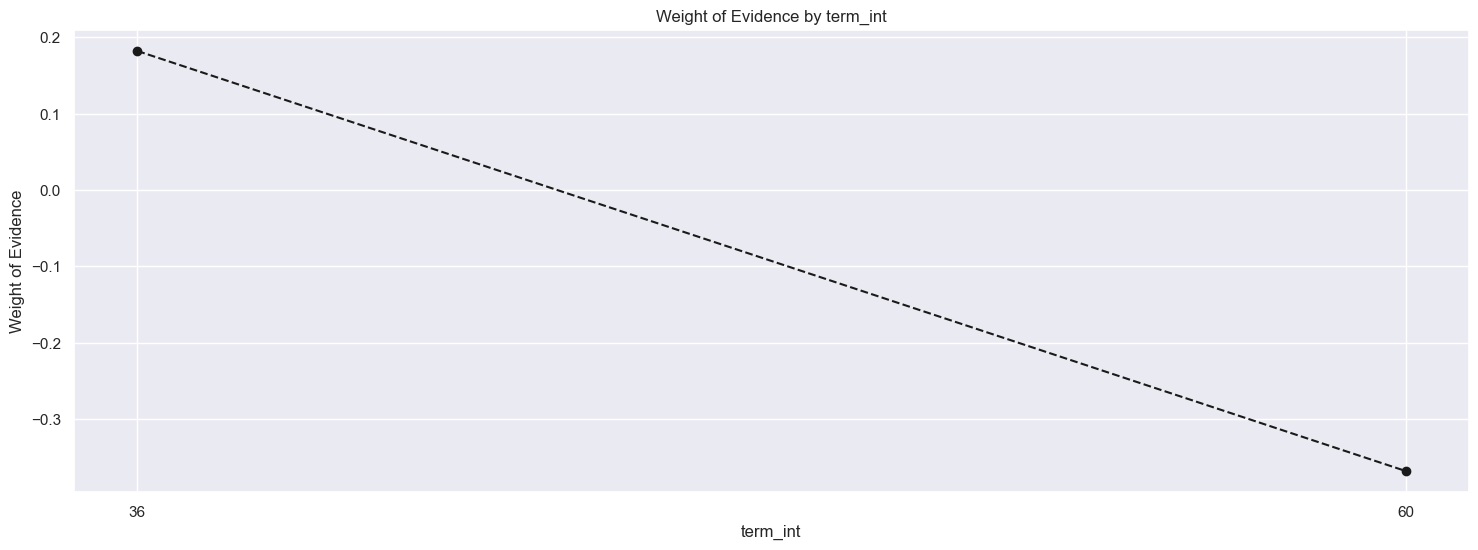

In [270]:
plot_by_woe(df_temp)

Since we only have two discrete values for 'term_int', we can dummy code them to 1 and 0

In [271]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

Find unique values of 'emp_length_int'

In [272]:
df_inputs_prepr['emp_length_int'].unique()

array([ 2.,  0.,  3., 10.,  8.,  7.,  5.,  1.,  4.,  6.,  9.])

Calculate WoE and IV for 'emp_length_int'

In [273]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,67477,0.862368,0.149241,58190.0,9287.0,0.147292,0.162733,-0.099691,NaN,NaN,0.004397
1,1.0,29429,0.871283,0.065089,25641.0,3788.0,0.064903,0.066376,-0.022435,0.008916,0.077257,0.004397
2,2.0,40859,0.874324,0.090369,35724.0,5135.0,0.090426,0.089979,0.004954,0.003040,0.027388,0.004397
3,3.0,36130,0.871852,0.079910,31500.0,4630.0,0.079734,0.081130,-0.017359,0.002472,0.022312,0.004397
4,4.0,27463,0.881295,0.060741,24203.0,3260.0,0.061263,0.057124,0.069960,0.009443,0.087319,0.004397
5,5.0,28062,0.873138,0.062066,24502.0,3560.0,0.062020,0.062381,-0.005795,0.008157,0.075755,0.004397
6,6.0,20456,0.875929,0.045243,17918.0,2538.0,0.045355,0.044472,0.019640,0.002791,0.025435,0.004397
7,7.0,18282,0.863308,0.040435,15783.0,2499.0,0.039950,0.043789,-0.091746,0.012621,0.111387,0.004397
8,8.0,18480,0.862825,0.040873,15945.0,2535.0,0.040360,0.044420,-0.095838,0.000483,0.004091,0.004397
9,9.0,15887,0.867754,0.035138,13786.0,2101.0,0.034896,0.036815,-0.053549,0.004929,0.042288,0.004397


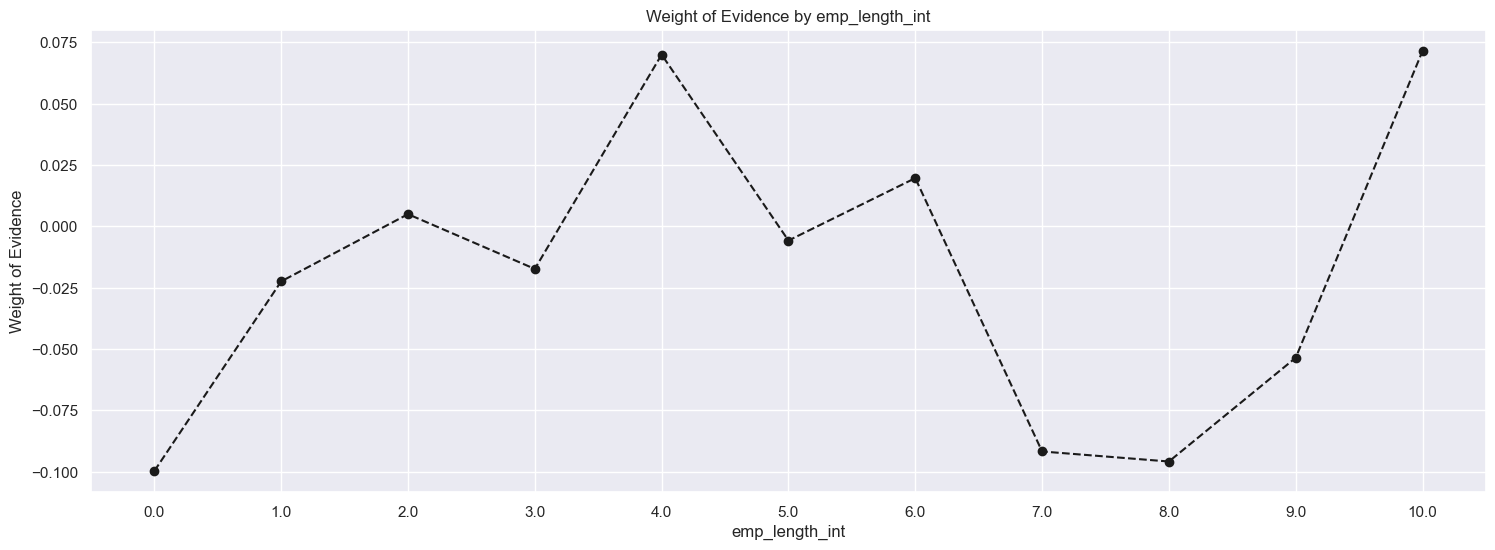

In [274]:
plot_by_woe(df_temp)

Group together like values to generate fewer factors

In [275]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,6)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,9)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

Find unique values for the 'mths_since_issue_date' attribute

In [277]:
df_inputs_prepr['mths_since_issue_date'].unique()

array([105.,  83.,  92.,  72., 116.,  98., 109.,  74.,  86.,  79., 126.,
        97.,  99., 129.,  80.,  73.,  71.,  94.,  95.,  87.,  82.,  84.,
       103., 106., 152., 113., 104.,  81., 108.,  90.,  85.,  78.,  89.,
        77.,  75., 102., 112.,  93., 107., 125., 101., 123., 100., 115.,
       119., 124., 145., 155.,  96., 136., 158., 133., 111., 173., 118.,
       139.,  76.,  91., 120., 110.,  70.,  88., 121., 179., 189., 114.,
       131., 122., 169., 142., 138., 148., 170., 163., 135., 157., 149.,
       150., 143., 137., 147., 153., 144.,  69., 151., 130., 141., 127.,
       176., 200., 183., 156., 195., 128., 167., 134., 132., 146., 177.,
       117., 140., 175., 172., 154., 180., 164., 188., 174., 178., 160.,
       166., 161., 168., 181., 165., 159., 171., 187., 185., 192., 182.,
       198., 186., 199., 197., 184., 205., 207., 194., 193., 201., 190.,
       202., 196., 204., 191., 203., 206.])

Cut 'mths_since_issue_date' value into 50 distinct ranges

In [278]:
df_inputs_prepr['mths_since_issue_date_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_date'], 50)

In [279]:
df_inputs_prepr['mths_since_issue_date_factor']

946945     (104.88, 107.64]
2235011       (82.8, 85.56]
1444818      (91.08, 93.84]
139727       (71.76, 74.52]
1335766    (115.92, 118.68]
                 ...       
835023       (91.08, 93.84]
2036588     (124.2, 126.96]
402267       (77.28, 80.04]
2166168       (80.04, 82.8]
1155795     (107.64, 110.4]
Name: mths_since_issue_date_factor, Length: 452134, dtype: category
Categories (50, interval[float64, right]): [(68.862, 71.76] < (71.76, 74.52] < (74.52, 77.28] < (77.28, 80.04] ... (195.96, 198.72] < (198.72, 201.48] < (201.48, 204.24] < (204.24, 207.0]]

Calculate WoE and IV for 'mths_since_issue_date_factor'

In [280]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_date_factor', df_targets_prepr)
df_temp

,mths_since_issue_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(68.862, 71.76]",25687,0.995679,0.056813,25576.0,111.0,0.064739,0.001945,3.505090,NaN,NaN,0.535129
1,"(71.76, 74.52]",25557,0.983136,0.056525,25126.0,431.0,0.063600,0.007552,2.130761,0.012543,1.374329,0.535129
2,"(74.52, 77.28]",26190,0.960787,0.057925,25163.0,1027.0,0.063693,0.017996,1.263943,0.022349,0.866818,0.535129
3,"(77.28, 80.04]",21398,0.946911,0.047327,20262.0,1136.0,0.051288,0.019906,0.946445,0.013876,0.317499,0.535129
4,"(80.04, 82.8]",16043,0.926074,0.035483,14857.0,1186.0,0.037606,0.020782,0.593096,0.020837,0.353349,0.535129
5,"(82.8, 85.56]",24280,0.905643,0.053701,21989.0,2291.0,0.055659,0.040144,0.326765,0.020431,0.266331,0.535129
6,"(85.56, 88.32]",22983,0.888918,0.050832,20430.0,2553.0,0.051713,0.044735,0.144946,0.016725,0.181819,0.535129
7,"(88.32, 91.08]",18566,0.880534,0.041063,16348.0,2218.0,0.041381,0.038865,0.062710,0.008384,0.082236,0.535129
8,"(91.08, 93.84]",13571,0.861985,0.030015,11698.0,1873.0,0.029610,0.032820,-0.102913,0.018549,0.165623,0.535129
9,"(93.84, 96.6]",19163,0.855294,0.042383,16390.0,2773.0,0.041487,0.048590,-0.158048,0.006691,0.055135,0.535129


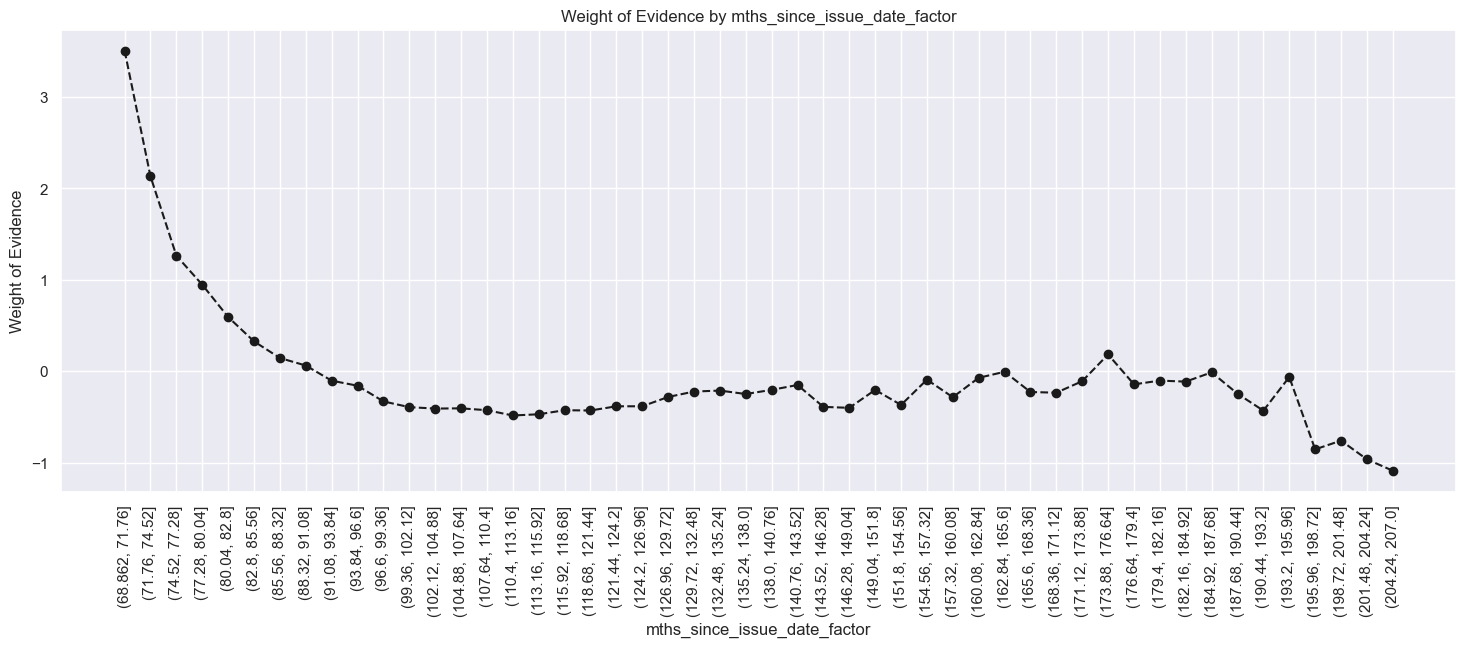

In [282]:
plot_by_woe(df_temp, 90)

View graph without outliers

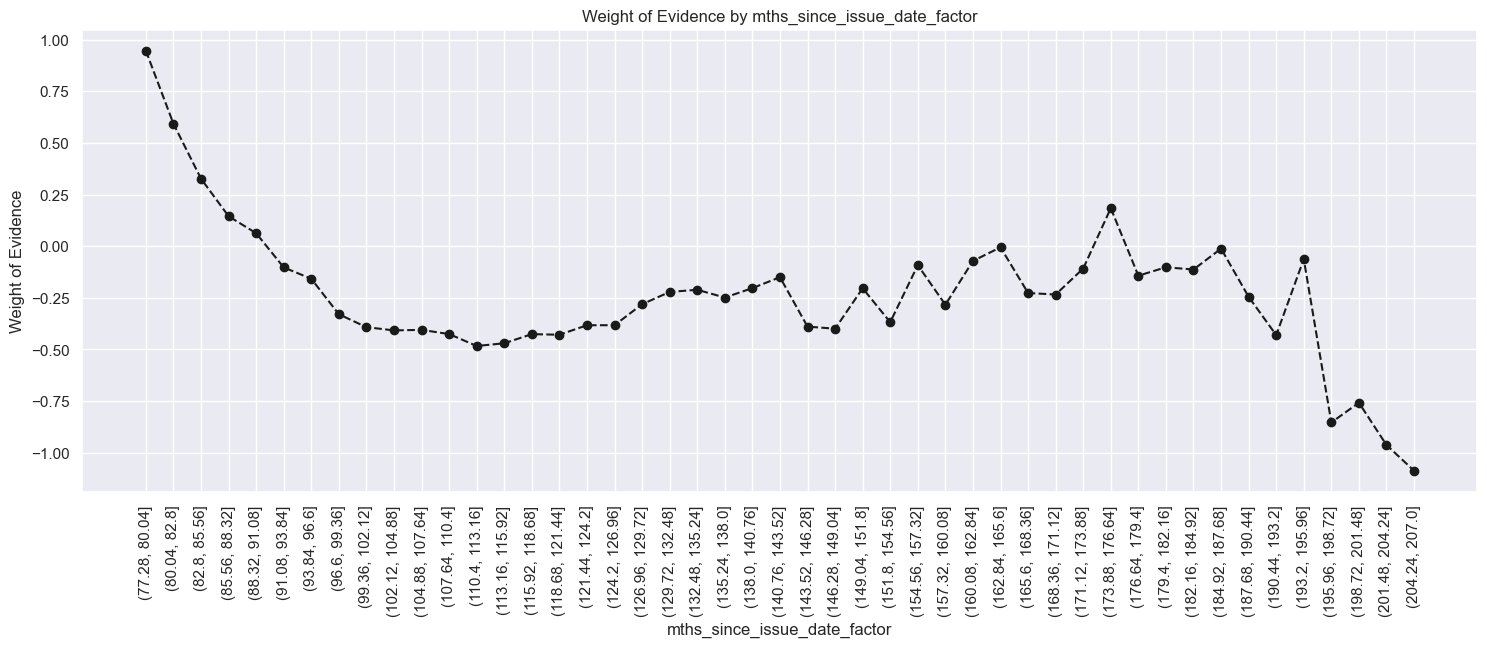

In [283]:
plot_by_woe(df_temp.iloc[3:, :], 90)

Group together like values to generate fewer factors

In [ ]:
df_inputs_prepr['mths_since_issue_date:<100'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(100)), 1, 0)
df_inputs_prepr['mths_since_issue_date:100-150'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(100,150)), 1, 0)
df_inputs_prepr['mths_since_issue_date:150-210'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(150,210)), 1, 0)


Cut 'int_rate' value into 50 distinct ranges
Calculate WoE and IV for 'int_rate'

In [284]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.284, 5.824]",11282,0.977132,0.024953,11024.0,258.0,0.027904,0.004521,1.820081,NaN,NaN,0.46658
1,"(5.824, 6.337]",9791,0.983556,0.021655,9630.0,161.0,0.024376,0.002821,2.156445,0.006425,0.336364,0.46658
2,"(6.337, 6.851]",10248,0.972385,0.022666,9965.0,283.0,0.025224,0.004959,1.626598,0.011171,0.529847,0.46658
3,"(6.851, 7.364]",18961,0.962607,0.041937,18252.0,709.0,0.046200,0.012424,1.313385,0.009777,0.313213,0.46658
4,"(7.364, 7.878]",10911,0.962698,0.024132,10504.0,407.0,0.026588,0.007132,1.315909,0.000091,0.002524,0.46658
5,"(7.878, 8.392]",27700,0.937978,0.061265,25982.0,1718.0,0.065766,0.030104,0.781454,0.024720,0.534455,0.46658
6,"(8.392, 8.905]",7342,0.953282,0.016239,6999.0,343.0,0.017716,0.006010,1.081003,0.015304,0.299549,0.46658
7,"(8.905, 9.419]",9476,0.897531,0.020958,8505.0,971.0,0.021528,0.017014,0.235294,0.055752,0.845709,0.46658
8,"(9.419, 9.932]",19783,0.937472,0.043755,18546.0,1237.0,0.046944,0.021676,0.772776,0.039941,0.537482,0.46658
9,"(9.932, 10.446]",15911,0.933882,0.035191,14859.0,1052.0,0.037612,0.018434,0.713123,0.003589,0.059652,0.46658


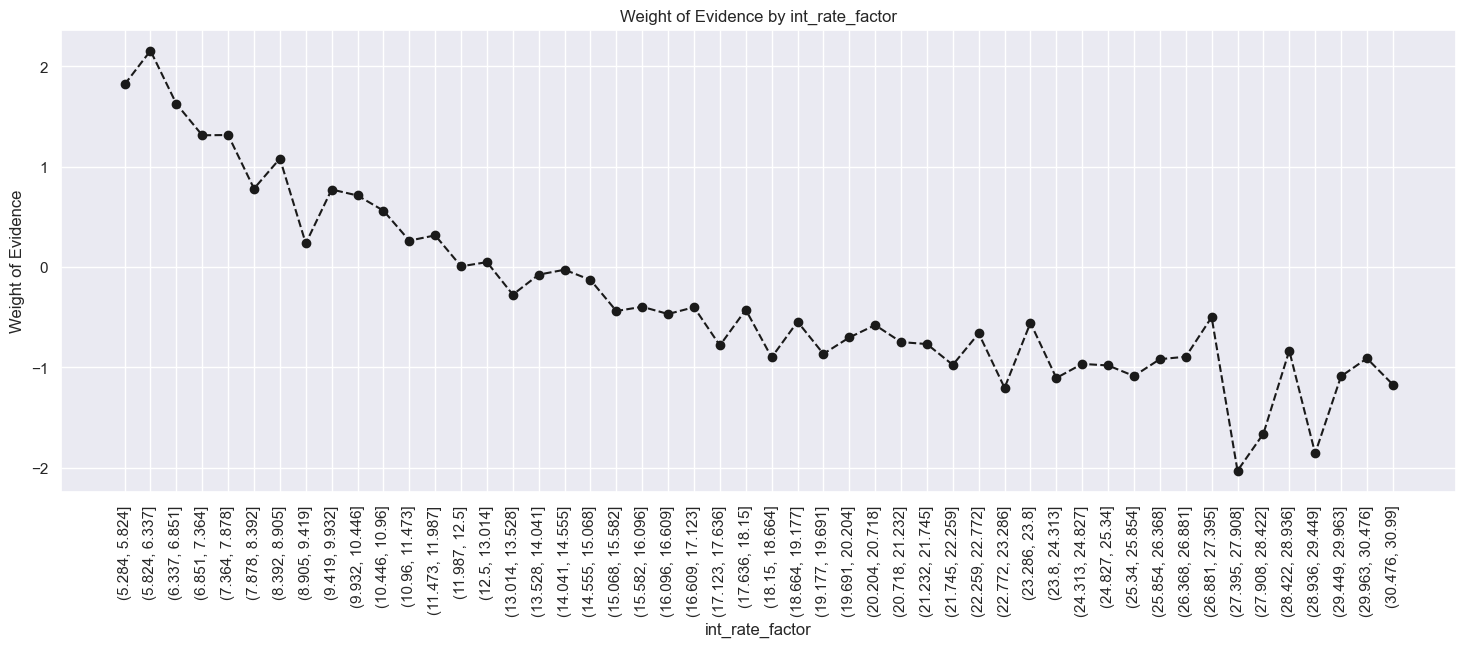

In [289]:
plot_by_woe(df_temp, 90)

Group together like values to generate fewer factors

In [290]:
df_inputs_prepr['int_rate:< 9.419'] = np.where((df_inputs_prepr['int_rate'] <= 9.419), 1,0)
df_inputs_prepr['int_rate: 9.419-16.609'] =np.where((df_inputs_prepr['int_rate'] > 9.419) & (df_inputs_prepr['int_rate'] <= 16.609), 1,0)
df_inputs_prepr['int_rate:16.609-26.881'] =np.where((df_inputs_prepr['int_rate'] > 16.609) & (df_inputs_prepr['int_rate'] <= 26.881), 1,0)
df_inputs_prepr['int_rate:26.881-30.99'] =np.where((df_inputs_prepr['int_rate'] > 26.881) & (df_inputs_prepr['int_rate'] <= 30.99), 1,0)
